# Optimization - Non Linear Equation Systems

In [1]:
from scipy import linalg as la
from scipy import optimize as op
import sympy
sympy.init_printing()
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

In [3]:
from __future__ import division

Multivariate case: the best way is with scipy.fsolve

### Multivariate

In [4]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

# f(x,y) = [y - x**3 - 2x**2 + 1, y + x**2 - 1]
# f(x,y) = [f1(x,y)             , f2(x,y)     ]

# f1(x,y) = y - x**3 - 2x**2 + 1
# f2(x,y) = y + x**2 - 1

# Jacobian is a matrix
# Jacobian = -3x**2 - 4x, 1 
#             2x       , 1

In [5]:
# Solution without passing the Jacobian
op.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [6]:
def f_jacobian(x):
    return [
        [-3*x[0]**2-4*x[0], 1], 
        [2*x[0], 1]
    ]

In [7]:
# Solution wit passing the Jacobian
op.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

In [8]:
# this is NOT CORRECT - See below the Jacobian using sympy.symbols
def f_jacobian_2(x):
    return [
        [-3*x[0]**2-4*x[0], 2*x[0]], 
        [1, 1]
    ]

op.fsolve(f, [1, 1], fprime=f_jacobian_2)

array([0.73205081, 0.46410162])

In [9]:
x, y = sympy.symbols("x, y")

In [10]:
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat 

⎡   3      2        ⎤
⎢- x  - 2⋅x  + y + 1⎥
⎢                   ⎥
⎢     2             ⎥
⎣    x  + y - 1     ⎦

In [11]:
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

Text(0.5, 0, '$x$')

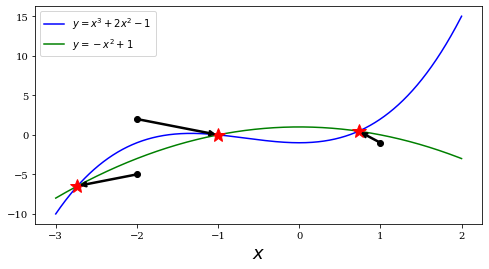

In [12]:
def f(x):
    return [
        x[1] - x[0]**3 - 2 * x[0]**2 + 1, 
        x[1] + x[0]**2 - 1
    ]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = op.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
    
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)

In [13]:
op.broyden2(f, x_guesses[1])

array([0.73205079, 0.46410162])

In [14]:
print (f(op.broyden2(f, x_guesses[1])))

[8.787501992735258e-08, -2.012504607407095e-08]


C:\Users\User\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 0, '$x$')

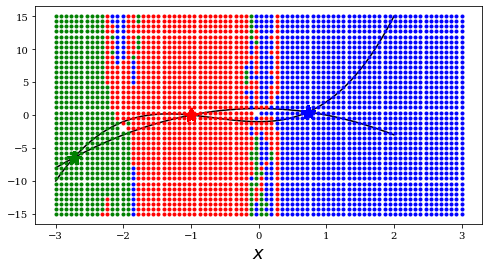

In [15]:
# WITH op.fsolve
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1,
            x[1] + x[0]**2 - 1]

x  = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = op.fsolve(f, [-2,  2])
sol2 = op.fsolve(f, [ 1, -1])
sol3 = op.fsolve(f, [-2, -5])

colors = ['r', 'b', 'g']
for m in np.linspace(-3, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = op.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
            #if abs(s-sol).max() < 1e-10:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)


In [16]:
sol = op.fsolve(f, [-2,  2])
print (op.fsolve(f, [-2,  2]))
print (sol.shape)
print (sol[0])
print (sol[1])

my_list = [sol1, sol2, sol3]
for idx, s in enumerate(my_list):
    print (idx)
    print (s)

[-1.0000000e+00  4.2114094e-15]
(2,)
-0.9999999999999996
4.211409397567879e-15
0
[-1.0000000e+00  4.2114094e-15]
1
[0.73205081 0.46410162]
2
[-2.73205081 -6.46410161]


In [17]:
# A simple check on how to use enumerate !!!
my_list = ['apple', 'banana', 'grapes', 'pear']
for c, value in enumerate(my_list, 1):
    print(c, value)
print ("-----------------")
for c, value in enumerate(my_list):
    print(c, value)

1 apple
2 banana
3 grapes
4 pear
-----------------
0 apple
1 banana
2 grapes
3 pear


Text(0.5, 0, '$x$')

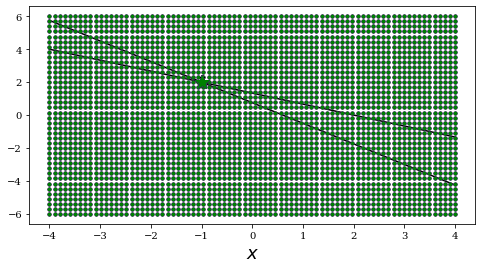

In [18]:
# Solutions for a Linear system, with different starting points

def fL(x):
    return [3*x[1] + 2*x[0] - 4 ,
            4*x[1] + 5*x[0] - 3]

x  = np.linspace(-4, 4, 5000)
y1 = -2.0/3.0*x + 4.0/3.0
y2 = -5.0/4.0*x + 3.0/4.0

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = op.fsolve(fL, [-1,  2])
sol2 = op.fsolve(fL, [ 1,  4])
sol3 = op.fsolve(fL, [-2, -3])

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 4, 80):
    for n in np.linspace(-6, 6, 40):
        x_guess = [m, n]
        sol = op.fsolve(fL, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
    
ax.set_xlabel(r'$x$', fontsize=18)

In [19]:
print (op.fsolve(fL, [1, 1]))
print (fL(op.fsolve(fL, [1, 1])))

[-1.  2.]
[-4.440892098500626e-16, 0.0]
